In [33]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
import statsmodels.api as sm

In [34]:
df = pd.read_csv('race_comparison.csv')
df = df[df.police_per_1k != 0]
df

,Unnamed: 0,metro_geocode,metro_geoname,metro_lon,metro_lat,metro_code,metro_total,metro_white,metro_hispanic,metro_black,...,metro_twoplus,City,State,County,Zip,Country,Source,police_per_1k,offenses_per_1k,median_income
0,0,35620,"New York-Newark-Jersey City, NY-NJ-PA",-74.08437,40.92033,6,100,46.34439,24.64721,15.80719,...,1.58744,New York,NY,New York County,10004.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,6.133633,40.868358,77003
1,1,31080,"Los Angeles-Long Beach-Anaheim, CA",-118.14932,34.22097,6,100,29.47629,45.16830,6.44860,...,2.25123,Los Angeles,CA,La Salle County,78014.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,3.228495,65.622083,71074
2,2,16980,"Chicago-Naperville-Elgin, IL-IN-WI",-87.96261,41.70249,6,100,52.59152,22.41137,16.32760,...,1.53452,Chicago,IL,Cook County,60601.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,5.180293,83.915163,74605
3,3,19100,"Dallas-Fort Worth-Arlington, TX",-97.02543,32.81841,6,100,45.75036,29.04334,15.78827,...,1.78832,Dallas,TX,Dallas County,75201.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,2.628324,80.422616,73537
4,4,26420,"Houston-The Woodlands-Sugar Land, TX",-95.39950,29.78605,6,100,35.64306,37.63239,17.03209,...,1.46176,Houston,TX,Harris County,77001.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,2.668695,100.722143,70362
5,5,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",-77.47405,38.83342,6,100,45.07073,16.12978,25.07391,...,2.84548,Washington,DC,NaN,NaN,US,US Census Bureau,6.434576,104.223046,108625
6,6,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",-80.50479,26.15622,6,100,29.97581,45.83857,20.32081,...,1.14781,Miami,FL,Miami-Dade County,33231.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,3.680395,83.894412,56534
7,7,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",-75.30339,39.90470,6,100,61.42822,9.70871,20.54679,...,1.92962,Philadelphia,PA,Philadelphia County,19019.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,4.641708,80.382326,75330
8,8,12060,"Atlanta-Sandy Springs-Roswell, GA",-84.39952,33.69269,6,100,46.64287,10.87732,34.12094,...,1.94943,Atlanta,GA,Fulton County,30301.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,4.005192,108.646136,69612
9,9,14460,"Boston-Cambridge-Newton, MA-NH",-71.10020,42.55728,3,100,70.14175,11.54695,7.88868,...,1.80712,Boston,MA,Suffolk County,2101.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,3.908314,52.775910,89184


In [35]:
trimmed = df[['City','metro_black', 'police_per_1k', 'offenses_per_1k', 'median_income']].set_index('City')
trimmed = trimmed[(trimmed != 0).all(1)]
trimmed

,metro_black,police_per_1k,offenses_per_1k,median_income
City,,,,
New York,15.80719,6.133633,40.868358,77003
Los Angeles,6.44860,3.228495,65.622083,71074
Chicago,16.32760,5.180293,83.915163,74605
Dallas,15.78827,2.628324,80.422616,73537
Houston,17.03209,2.668695,100.722143,70362
Washington,25.07391,6.434576,104.223046,108625
Miami,20.32081,3.680395,83.894412,56534
Philadelphia,20.54679,4.641708,80.382326,75330
Atlanta,34.12094,4.005192,108.646136,69612


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


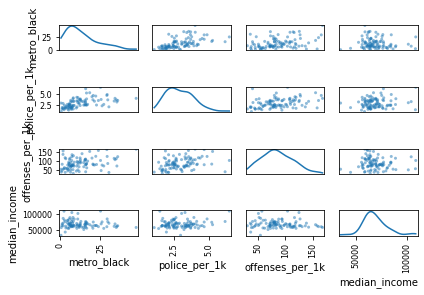

In [36]:
pd.tools.plotting.scatter_matrix(trimmed, diagonal="kde")
plt.tight_layout()
plt.show()

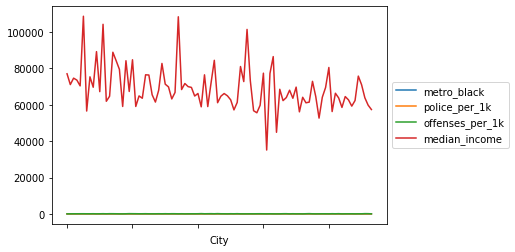

In [37]:
ax = trimmed.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [38]:
corrmat = trimmed.corr()
corrmat

,metro_black,police_per_1k,offenses_per_1k,median_income
metro_black,1.000000,0.538951,0.347633,-0.081102
police_per_1k,0.538951,1.000000,0.352041,0.152693
offenses_per_1k,0.347633,0.352041,1.000000,-0.057537
median_income,-0.081102,0.152693,-0.057537,1.000000


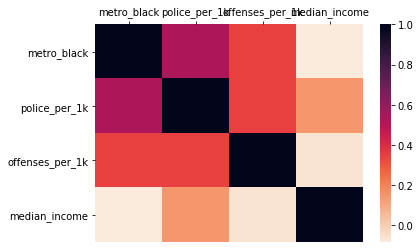

In [39]:
sns.heatmap(corrmat, vmax=1., square=False, cmap="rocket_r").xaxis.tick_top()

In [51]:
X = trimmed[["metro_black", "offenses_per_1k", "median_income"]]
y = trimmed["police_per_1k"]
model = sm.OLS(y, X).fit()
# X = sm.add_constant(X)
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          police_per_1k   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     401.6
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.43e-52
Time:                        10:37:20   Log-Likelihood:                -116.10
No. Observations:                  94   AIC:                             238.2
Df Residuals:                      91   BIC:                             245.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
metro_black         0.0529      0.010      5.570      0.000       0.034       0.072
offenses_per_1k     0.0074      0.003      2.736      0.007       0.002       0.013
median_income    2.339e-05   3.27e-06      7.160      0.000    1.69e-05    2.99e-05
==============================================================================
Omnibus:                       15.686   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.153
Skew:                           0.911   Prob(JB):                     0.000114
Kurtosis:                       4.146   Cond. No.                     7.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature: 0, Score: 0.05196
Feature: 1, Score: 0.00638
Feature: 2, Score: 0.00002


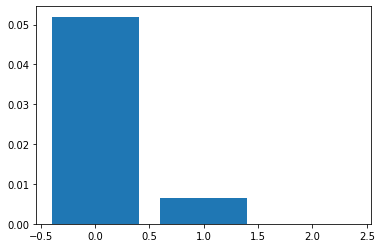

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [25]:
X = df[["metro_black"]]
y = df["police_per_1k"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          police_per_1k   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     36.84
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.55e-08
Time:                        09:56:29   Log-Likelihood:                -126.81
No. Observations:                  98   AIC:                             257.6
Df Residuals:                      96   BIC:                             262.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1853      0.152     14.410      0.000       1.884       2.486
metro_black     0.0569      0.009      6.069      0.000       0.038       0.075
==============================================================================
Omnibus:                       16.350   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.111
Skew:                           0.921   Prob(JB):                     7.08e-05
Kurtosis:                       4.135   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
trimmed.to_csv('trimmed_race.csv')

,Unnamed: 0,metro_geocode,metro_geoname,metro_lon,metro_lat,metro_code,metro_total,metro_white,metro_hispanic,metro_black,...,metro_twoplus,City,State,County,Zip,Country,Source,police_per_1k,offenses_per_1k,median_income
0,0,35620,"New York-Newark-Jersey City, NY-NJ-PA",-74.08437,40.92033,6,100,46.34439,24.64721,15.80719,...,1.58744,New York,NY,New York County,10004.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,6.133633,40.868358,77003
1,1,31080,"Los Angeles-Long Beach-Anaheim, CA",-118.14932,34.22097,6,100,29.47629,45.16830,6.44860,...,2.25123,Los Angeles,CA,La Salle County,78014.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,3.228495,65.622083,71074
2,2,16980,"Chicago-Naperville-Elgin, IL-IN-WI",-87.96261,41.70249,6,100,52.59152,22.41137,16.32760,...,1.53452,Chicago,IL,Cook County,60601.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,5.180293,83.915163,74605
3,3,19100,"Dallas-Fort Worth-Arlington, TX",-97.02543,32.81841,6,100,45.75036,29.04334,15.78827,...,1.78832,Dallas,TX,Dallas County,75201.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,2.628324,80.422616,73537
4,4,26420,"Houston-The Woodlands-Sugar Land, TX",-95.39950,29.78605,6,100,35.64306,37.63239,17.03209,...,1.46176,Houston,TX,Harris County,77001.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,2.668695,100.722143,70362
5,5,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",-77.47405,38.83342,6,100,45.07073,16.12978,25.07391,...,2.84548,Washington,DC,NaN,NaN,US,US Census Bureau,6.434576,104.223046,108625
6,6,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",-80.50479,26.15622,6,100,29.97581,45.83857,20.32081,...,1.14781,Miami,FL,Miami-Dade County,33231.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,3.680395,83.894412,56534
7,7,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",-75.30339,39.90470,6,100,61.42822,9.70871,20.54679,...,1.92962,Philadelphia,PA,Philadelphia County,19019.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,4.641708,80.382326,75330
8,8,12060,"Atlanta-Sandy Springs-Roswell, GA",-84.39952,33.69269,6,100,46.64287,10.87732,34.12094,...,1.94943,Atlanta,GA,Fulton County,30301.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,4.005192,108.646136,69612
9,9,14460,"Boston-Cambridge-Newton, MA-NH",-71.10020,42.55728,3,100,70.14175,11.54695,7.88868,...,1.80712,Boston,MA,Suffolk County,2101.0,US,TIGER/Lineå¨ dataset from the US Census Bureau,3.908314,52.775910,89184
